# 选股表格回测
1. 等权重下单
2. 按照特定权重下单
3. 策略优化

In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
from jaqs_fxdayu.data.dataapi import DataApi
from jaqs_fxdayu.data import DataView
from jaqs_fxdayu.research import SignalDigger
import numpy as np
from datetime import datetime
import pandas as pd
from datetime import timedelta

dataview_folder = '../Factor'
dv = DataView()
dv.load_dataview(dataview_folder)

Dataview loaded successfully.


In [16]:
#dv.get_ts('roe')

In [4]:
def change_columns_index(signal):
    new_names = {}
    for c in signal.columns:
        if c.endswith('SZ'):
            new_names[c] = c.replace('SZ', 'XSHE')
        elif c.endswith('SH'):
            new_names[c] = c.replace('SH', 'XSHG')
    signal = signal.rename_axis(new_names, axis=1)
    signal.index = pd.Index(map(lambda x: datetime.strptime(str(x),"%Y%m%d") , signal.index))
    signal.index = pd.Index(map(lambda x: x+timedelta(hours=15), signal.index))
    return signal

In [5]:
def mask_index_member():
    df_index_member = dv.get_ts('index_member')
    mask_index_member = df_index_member == 0
    return mask_index_member
mask = mask_index_member()
ROE_Data = change_columns_index(dv.get_ts('roe').shift(1, axis=0)[mask==0])
prices = change_columns_index(dv.get_ts('close_adj'))

In [6]:
def get_largest(df, n=20):
    largest_list = []
    for time_index, value in df.iterrows():
        largest_list.append(dict.fromkeys(value.nlargest(n).index,1))
    largest_df = pd.DataFrame(largest_list, index = df.index)
    return largest_df

In [7]:
stock_df = get_largest(ROE_Data).dropna(how='all', axis=1)

In [8]:
stock_df.to_excel('roe_backtest.xlsx')

## 等权重下单

Index(['000166.XSHE', '000333.XSHE', '000625.XSHE', '000686.XSHE',
       '000712.XSHE', '000783.XSHE', '000963.XSHE', '002673.XSHE',
       '002736.XSHE', '300017.XSHE', '300059.XSHE', '600177.XSHG',
       '600340.XSHG', '600398.XSHG', '600649.XSHG', '600958.XSHG',
       '600999.XSHG', '601377.XSHG', '601788.XSHG', '603288.XSHG'],
      dtype='object')
Index(['000166.XSHE', '000333.XSHE', '000625.XSHE', '000686.XSHE',
       '000712.XSHE', '000783.XSHE', '000963.XSHE', '002673.XSHE',
       '002736.XSHE', '300017.XSHE', '300059.XSHE', '600177.XSHG',
       '600340.XSHG', '600398.XSHG', '600649.XSHG', '600958.XSHG',
       '600999.XSHG', '601377.XSHG', '601788.XSHG', '603288.XSHG'],
      dtype='object')
Index(['000166.XSHE', '000333.XSHE', '000625.XSHE', '000686.XSHE',
       '000712.XSHE', '000783.XSHE', '000963.XSHE', '002673.XSHE',
       '002736.XSHE', '300017.XSHE', '300059.XSHE', '600177.XSHG',
       '600340.XSHG', '600398.XSHG', '600649.XSHG', '600958.XSHG',
       '600999.X

      dtype='object')
Index(['000166.XSHE', '000333.XSHE', '000625.XSHE', '000686.XSHE',
       '000712.XSHE', '000783.XSHE', '000963.XSHE', '002673.XSHE',
       '002736.XSHE', '300017.XSHE', '300059.XSHE', '600177.XSHG',
       '600340.XSHG', '600398.XSHG', '600649.XSHG', '600958.XSHG',
       '600999.XSHG', '601377.XSHG', '601788.XSHG', '603288.XSHG'],
      dtype='object')
Index(['000166.XSHE', '000333.XSHE', '000625.XSHE', '000686.XSHE',
       '000712.XSHE', '000783.XSHE', '000963.XSHE', '002673.XSHE',
       '002736.XSHE', '300017.XSHE', '300059.XSHE', '600177.XSHG',
       '600340.XSHG', '600398.XSHG', '600649.XSHG', '600958.XSHG',
       '600999.XSHG', '601377.XSHG', '601788.XSHG', '603288.XSHG'],
      dtype='object')
Index(['000166.XSHE', '000333.XSHE', '000625.XSHE', '000686.XSHE',
       '000712.XSHE', '000783.XSHE', '000963.XSHE', '002673.XSHE',
       '002736.XSHE', '300017.XSHE', '300059.XSHE', '600177.XSHG',
       '600340.XSHG', '600398.XSHG', '600649.XSHG', '600958.X

      dtype='object')
Index(['000166.XSHE', '000333.XSHE', '000625.XSHE', '000651.XSHE',
       '000686.XSHE', '000712.XSHE', '000783.XSHE', '000963.XSHE',
       '002294.XSHE', '002304.XSHE', '002415.XSHE', '002736.XSHE',
       '300017.XSHE', '300059.XSHE', '600340.XSHG', '600398.XSHG',
       '600958.XSHG', '601021.XSHG', '601377.XSHG', '603288.XSHG'],
      dtype='object')
Index(['000166.XSHE', '000333.XSHE', '000625.XSHE', '000651.XSHE',
       '000686.XSHE', '000712.XSHE', '000783.XSHE', '000963.XSHE',
       '002294.XSHE', '002304.XSHE', '002415.XSHE', '002736.XSHE',
       '300017.XSHE', '300059.XSHE', '600340.XSHG', '600398.XSHG',
       '600958.XSHG', '601021.XSHG', '601377.XSHG', '603288.XSHG'],
      dtype='object')
Index(['000166.XSHE', '000333.XSHE', '000625.XSHE', '000651.XSHE',
       '000686.XSHE', '000712.XSHE', '000783.XSHE', '000963.XSHE',
       '002294.XSHE', '002304.XSHE', '002415.XSHE', '002736.XSHE',
       '300017.XSHE', '300059.XSHE', '600340.XSHG', '600398.X

      dtype='object')
Index(['000166.XSHE', '000333.XSHE', '000540.XSHE', '000625.XSHE',
       '000651.XSHE', '000686.XSHE', '000712.XSHE', '000963.XSHE',
       '002294.XSHE', '002415.XSHE', '002736.XSHE', '002739.XSHE',
       '300017.XSHE', '300059.XSHE', '600340.XSHG', '600398.XSHG',
       '600958.XSHG', '601021.XSHG', '603288.XSHG', '603885.XSHG'],
      dtype='object')
Index(['000166.XSHE', '000333.XSHE', '000540.XSHE', '000625.XSHE',
       '000651.XSHE', '000686.XSHE', '000712.XSHE', '000963.XSHE',
       '002294.XSHE', '002415.XSHE', '002736.XSHE', '002739.XSHE',
       '300017.XSHE', '300059.XSHE', '600340.XSHG', '600398.XSHG',
       '600958.XSHG', '601021.XSHG', '603288.XSHG', '603885.XSHG'],
      dtype='object')
Index(['000166.XSHE', '000333.XSHE', '000540.XSHE', '000625.XSHE',
       '000651.XSHE', '000686.XSHE', '000712.XSHE', '000963.XSHE',
       '002294.XSHE', '002415.XSHE', '002736.XSHE', '002739.XSHE',
       '300017.XSHE', '300059.XSHE', '600340.XSHG', '600398.X

      dtype='object')
Index(['000166.XSHE', '000333.XSHE', '000540.XSHE', '000625.XSHE',
       '000651.XSHE', '000686.XSHE', '000712.XSHE', '000963.XSHE',
       '002294.XSHE', '002415.XSHE', '002736.XSHE', '002739.XSHE',
       '300017.XSHE', '300059.XSHE', '600340.XSHG', '600398.XSHG',
       '600958.XSHG', '601021.XSHG', '603288.XSHG', '603885.XSHG'],
      dtype='object')
Index(['000166.XSHE', '000333.XSHE', '000540.XSHE', '000625.XSHE',
       '000651.XSHE', '000686.XSHE', '000712.XSHE', '000963.XSHE',
       '002294.XSHE', '002415.XSHE', '002736.XSHE', '002739.XSHE',
       '300017.XSHE', '300059.XSHE', '600340.XSHG', '600398.XSHG',
       '600958.XSHG', '601021.XSHG', '603288.XSHG', '603885.XSHG'],
      dtype='object')
Index(['000166.XSHE', '000333.XSHE', '000540.XSHE', '000625.XSHE',
       '000651.XSHE', '000686.XSHE', '000712.XSHE', '000963.XSHE',
       '002294.XSHE', '002415.XSHE', '002736.XSHE', '002739.XSHE',
       '300017.XSHE', '300059.XSHE', '600340.XSHG', '600398.X

      dtype='object')
Index(['000166.XSHE', '000333.XSHE', '000540.XSHE', '000625.XSHE',
       '000651.XSHE', '000686.XSHE', '000712.XSHE', '000963.XSHE',
       '002294.XSHE', '002415.XSHE', '002736.XSHE', '002739.XSHE',
       '300017.XSHE', '300059.XSHE', '600340.XSHG', '600398.XSHG',
       '600958.XSHG', '601021.XSHG', '603288.XSHG', '603885.XSHG'],
      dtype='object')
Index(['000166.XSHE', '000333.XSHE', '000540.XSHE', '000625.XSHE',
       '000651.XSHE', '000686.XSHE', '000712.XSHE', '000963.XSHE',
       '002294.XSHE', '002415.XSHE', '002736.XSHE', '002739.XSHE',
       '300017.XSHE', '300059.XSHE', '600340.XSHG', '600398.XSHG',
       '600958.XSHG', '601021.XSHG', '603288.XSHG', '603885.XSHG'],
      dtype='object')
Index(['000166.XSHE', '000333.XSHE', '000540.XSHE', '000625.XSHE',
       '000712.XSHE', '000963.XSHE', '002236.XSHE', '002294.XSHE',
       '002415.XSHE', '002736.XSHE', '002739.XSHE', '300017.XSHE',
       '300059.XSHE', '600340.XSHG', '600398.XSHG', '600958.X

      dtype='object')
Index(['000166.XSHE', '000333.XSHE', '000423.XSHE', '000540.XSHE',
       '000712.XSHE', '000963.XSHE', '002294.XSHE', '002736.XSHE',
       '002739.XSHE', '300017.XSHE', '300059.XSHE', '600315.XSHG',
       '600340.XSHG', '600398.XSHG', '600519.XSHG', '600958.XSHG',
       '600999.XSHG', '601021.XSHG', '603288.XSHG', '603885.XSHG'],
      dtype='object')
Index(['000166.XSHE', '000333.XSHE', '000423.XSHE', '000540.XSHE',
       '000712.XSHE', '000895.XSHE', '000963.XSHE', '002294.XSHE',
       '002736.XSHE', '002739.XSHE', '300017.XSHE', '300059.XSHE',
       '600315.XSHG', '600340.XSHG', '600398.XSHG', '600519.XSHG',
       '600958.XSHG', '600999.XSHG', '603288.XSHG', '603885.XSHG'],
      dtype='object')
Index(['000166.XSHE', '000333.XSHE', '000423.XSHE', '000540.XSHE',
       '000712.XSHE', '000895.XSHE', '000963.XSHE', '002294.XSHE',
       '002736.XSHE', '300017.XSHE', '300059.XSHE', '600315.XSHG',
       '600340.XSHG', '600398.XSHG', '600519.XSHG', '600958.X

      dtype='object')
Index(['000333.XSHE', '000423.XSHE', '000540.XSHE', '000625.XSHE',
       '000858.XSHE', '000963.XSHE', '002294.XSHE', '002304.XSHE',
       '600029.XSHG', '600100.XSHG', '600115.XSHG', '600177.XSHG',
       '600276.XSHG', '600340.XSHG', '600398.XSHG', '600519.XSHG',
       '600690.XSHG', '600887.XSHG', '603288.XSHG', '603885.XSHG'],
      dtype='object')
Index(['000333.XSHE', '000423.XSHE', '000540.XSHE', '000625.XSHE',
       '000858.XSHE', '000963.XSHE', '002294.XSHE', '002304.XSHE',
       '600029.XSHG', '600100.XSHG', '600115.XSHG', '600177.XSHG',
       '600276.XSHG', '600340.XSHG', '600398.XSHG', '600519.XSHG',
       '600690.XSHG', '600887.XSHG', '603288.XSHG', '603885.XSHG'],
      dtype='object')
Index(['000333.XSHE', '000423.XSHE', '000540.XSHE', '000625.XSHE',
       '000858.XSHE', '000963.XSHE', '002294.XSHE', '002304.XSHE',
       '600029.XSHG', '600100.XSHG', '600115.XSHG', '600177.XSHG',
       '600276.XSHG', '600340.XSHG', '600398.XSHG', '600519.X

      dtype='object')
Index(['000333.XSHE', '000423.XSHE', '000540.XSHE', '000625.XSHE',
       '000858.XSHE', '000963.XSHE', '002294.XSHE', '002304.XSHE',
       '600029.XSHG', '600100.XSHG', '600115.XSHG', '600177.XSHG',
       '600276.XSHG', '600340.XSHG', '600398.XSHG', '600519.XSHG',
       '600690.XSHG', '600887.XSHG', '603288.XSHG', '603885.XSHG'],
      dtype='object')
Index(['000333.XSHE', '000423.XSHE', '000540.XSHE', '000625.XSHE',
       '000858.XSHE', '000963.XSHE', '002294.XSHE', '002304.XSHE',
       '600029.XSHG', '600100.XSHG', '600115.XSHG', '600177.XSHG',
       '600276.XSHG', '600340.XSHG', '600398.XSHG', '600519.XSHG',
       '600690.XSHG', '600887.XSHG', '603288.XSHG', '603885.XSHG'],
      dtype='object')
Index(['000333.XSHE', '000423.XSHE', '000540.XSHE', '000625.XSHE',
       '000651.XSHE', '000858.XSHE', '000963.XSHE', '002294.XSHE',
       '002304.XSHE', '600029.XSHG', '600100.XSHG', '600115.XSHG',
       '600177.XSHG', '600276.XSHG', '600340.XSHG', '600398.X

      dtype='object')
Index(['000333.XSHE', '000423.XSHE', '000540.XSHE', '000625.XSHE',
       '000963.XSHE', '002027.XSHE', '002294.XSHE', '002304.XSHE',
       '600029.XSHG', '600074.XSHG', '600100.XSHG', '600115.XSHG',
       '600177.XSHG', '600340.XSHG', '600398.XSHG', '600519.XSHG',
       '600690.XSHG', '600816.XSHG', '600887.XSHG', '603885.XSHG'],
      dtype='object')
Index(['000333.XSHE', '000423.XSHE', '000540.XSHE', '000625.XSHE',
       '000963.XSHE', '002027.XSHE', '002294.XSHE', '002304.XSHE',
       '600029.XSHG', '600074.XSHG', '600100.XSHG', '600115.XSHG',
       '600177.XSHG', '600340.XSHG', '600398.XSHG', '600519.XSHG',
       '600690.XSHG', '600816.XSHG', '600887.XSHG', '603885.XSHG'],
      dtype='object')
Index(['000333.XSHE', '000423.XSHE', '000540.XSHE', '000625.XSHE',
       '000963.XSHE', '002027.XSHE', '002294.XSHE', '002304.XSHE',
       '600029.XSHG', '600074.XSHG', '600100.XSHG', '600115.XSHG',
       '600177.XSHG', '600340.XSHG', '600398.XSHG', '600519.X

      dtype='object')
Index(['000333.XSHE', '000540.XSHE', '000625.XSHE', '000963.XSHE',
       '002027.XSHE', '002294.XSHE', '002304.XSHE', '002415.XSHE',
       '300017.XSHE', '300124.XSHE', '300146.XSHE', '600011.XSHG',
       '600074.XSHG', '600100.XSHG', '600177.XSHG', '600271.XSHG',
       '600309.XSHG', '600398.XSHG', '600816.XSHG', '603885.XSHG'],
      dtype='object')
Index(['000333.XSHE', '000540.XSHE', '000963.XSHE', '002027.XSHE',
       '002304.XSHE', '002415.XSHE', '300017.XSHE', '300124.XSHE',
       '300146.XSHE', '600000.XSHG', '600011.XSHG', '600015.XSHG',
       '600074.XSHG', '600100.XSHG', '600177.XSHG', '600271.XSHG',
       '600309.XSHG', '600398.XSHG', '600816.XSHG', '603885.XSHG'],
      dtype='object')
Index(['000333.XSHE', '000540.XSHE', '000963.XSHE', '002027.XSHE',
       '002304.XSHE', '002415.XSHE', '300017.XSHE', '300124.XSHE',
       '300146.XSHE', '600000.XSHG', '600011.XSHG', '600015.XSHG',
       '600074.XSHG', '600100.XSHG', '600177.XSHG', '600271.X

      dtype='object')
Index(['000333.XSHE', '000625.XSHE', '000651.XSHE', '000895.XSHE',
       '000963.XSHE', '002027.XSHE', '002294.XSHE', '002304.XSHE',
       '002415.XSHE', '600074.XSHG', '600100.XSHG', '600177.XSHG',
       '600340.XSHG', '600398.XSHG', '600519.XSHG', '600688.XSHG',
       '600690.XSHG', '600816.XSHG', '600887.XSHG', '603885.XSHG'],
      dtype='object')
Index(['000333.XSHE', '000625.XSHE', '000651.XSHE', '000895.XSHE',
       '000963.XSHE', '002027.XSHE', '002294.XSHE', '002304.XSHE',
       '002415.XSHE', '600074.XSHG', '600100.XSHG', '600177.XSHG',
       '600340.XSHG', '600398.XSHG', '600519.XSHG', '600688.XSHG',
       '600690.XSHG', '600816.XSHG', '600887.XSHG', '603885.XSHG'],
      dtype='object')
Index(['000333.XSHE', '000625.XSHE', '000651.XSHE', '000895.XSHE',
       '000963.XSHE', '002027.XSHE', '002294.XSHE', '002304.XSHE',
       '002415.XSHE', '600074.XSHG', '600100.XSHG', '600177.XSHG',
       '600340.XSHG', '600398.XSHG', '600519.XSHG', '600688.X

      dtype='object')
Index(['000333.XSHE', '000559.XSHE', '000625.XSHE', '000651.XSHE',
       '000963.XSHE', '002027.XSHE', '002236.XSHE', '002294.XSHE',
       '002304.XSHE', '002415.XSHE', '600074.XSHG', '600100.XSHG',
       '600177.XSHG', '600340.XSHG', '600398.XSHG', '600674.XSHG',
       '600688.XSHG', '600690.XSHG', '600816.XSHG', '600887.XSHG'],
      dtype='object')
Index(['000333.XSHE', '000559.XSHE', '000625.XSHE', '000963.XSHE',
       '002027.XSHE', '002236.XSHE', '002294.XSHE', '002304.XSHE',
       '002415.XSHE', '300015.XSHE', '600066.XSHG', '600074.XSHG',
       '600100.XSHG', '600177.XSHG', '600340.XSHG', '600398.XSHG',
       '600674.XSHG', '600688.XSHG', '600816.XSHG', '600887.XSHG'],
      dtype='object')
Index(['000333.XSHE', '000559.XSHE', '000625.XSHE', '000963.XSHE',
       '002027.XSHE', '002236.XSHE', '002294.XSHE', '002415.XSHE',
       '300015.XSHE', '600066.XSHG', '600074.XSHG', '600100.XSHG',
       '600340.XSHG', '600398.XSHG', '600674.XSHG', '600688.X

      dtype='object')
Index(['000333.XSHE', '000625.XSHE', '000651.XSHE', '000895.XSHE',
       '000963.XSHE', '002027.XSHE', '002294.XSHE', '002304.XSHE',
       '002415.XSHE', '300017.XSHE', '600074.XSHG', '600100.XSHG',
       '600309.XSHG', '600340.XSHG', '600398.XSHG', '600688.XSHG',
       '600718.XSHG', '600816.XSHG', '600887.XSHG', '603885.XSHG'],
      dtype='object')
Index(['000333.XSHE', '000625.XSHE', '000651.XSHE', '000895.XSHE',
       '000963.XSHE', '002027.XSHE', '002294.XSHE', '002304.XSHE',
       '002415.XSHE', '300017.XSHE', '600074.XSHG', '600100.XSHG',
       '600309.XSHG', '600340.XSHG', '600398.XSHG', '600688.XSHG',
       '600718.XSHG', '600816.XSHG', '600887.XSHG', '603885.XSHG'],
      dtype='object')
Index(['000333.XSHE', '000625.XSHE', '000651.XSHE', '000895.XSHE',
       '000963.XSHE', '002027.XSHE', '002294.XSHE', '002304.XSHE',
       '002415.XSHE', '300017.XSHE', '600074.XSHG', '600100.XSHG',
       '600309.XSHG', '600340.XSHG', '600398.XSHG', '600688.X

      dtype='object')
Index(['000333.XSHE', '000625.XSHE', '000651.XSHE', '000895.XSHE',
       '000963.XSHE', '002027.XSHE', '002074.XSHE', '002304.XSHE',
       '002415.XSHE', '002466.XSHE', '002714.XSHE', '300033.XSHE',
       '300072.XSHE', '600074.XSHG', '600100.XSHG', '600340.XSHG',
       '600718.XSHG', '600816.XSHG', '600887.XSHG', '603885.XSHG'],
      dtype='object')
Index(['000333.XSHE', '000625.XSHE', '000651.XSHE', '000895.XSHE',
       '000963.XSHE', '002027.XSHE', '002074.XSHE', '002304.XSHE',
       '002415.XSHE', '002466.XSHE', '002714.XSHE', '300033.XSHE',
       '300072.XSHE', '600074.XSHG', '600100.XSHG', '600340.XSHG',
       '600718.XSHG', '600816.XSHG', '600887.XSHG', '603885.XSHG'],
      dtype='object')
Index(['000333.XSHE', '000625.XSHE', '000651.XSHE', '000895.XSHE',
       '000963.XSHE', '002027.XSHE', '002074.XSHE', '002304.XSHE',
       '002415.XSHE', '002466.XSHE', '002714.XSHE', '300033.XSHE',
       '300072.XSHE', '600074.XSHG', '600100.XSHG', '600340.X

      dtype='object')
Index(['000333.XSHE', '000625.XSHE', '000651.XSHE', '000895.XSHE',
       '000963.XSHE', '002027.XSHE', '002074.XSHE', '002304.XSHE',
       '002415.XSHE', '002466.XSHE', '002714.XSHE', '300033.XSHE',
       '300072.XSHE', '600074.XSHG', '600100.XSHG', '600340.XSHG',
       '600718.XSHG', '600816.XSHG', '600887.XSHG', '603885.XSHG'],
      dtype='object')
Index(['000333.XSHE', '000625.XSHE', '000651.XSHE', '000895.XSHE',
       '000963.XSHE', '002027.XSHE', '002074.XSHE', '002304.XSHE',
       '002415.XSHE', '002466.XSHE', '002714.XSHE', '300033.XSHE',
       '300072.XSHE', '600074.XSHG', '600100.XSHG', '600340.XSHG',
       '600718.XSHG', '600816.XSHG', '600887.XSHG', '603885.XSHG'],
      dtype='object')
Index(['000333.XSHE', '000625.XSHE', '000651.XSHE', '000895.XSHE',
       '000963.XSHE', '002027.XSHE', '002074.XSHE', '002304.XSHE',
       '002415.XSHE', '002466.XSHE', '002714.XSHE', '300033.XSHE',
       '300072.XSHE', '600074.XSHG', '600100.XSHG', '600340.X

      dtype='object')
Index(['000333.XSHE', '000625.XSHE', '000651.XSHE', '000895.XSHE',
       '000963.XSHE', '002027.XSHE', '002074.XSHE', '002415.XSHE',
       '002466.XSHE', '002714.XSHE', '300033.XSHE', '300072.XSHE',
       '600074.XSHG', '600100.XSHG', '600340.XSHG', '600718.XSHG',
       '600816.XSHG', '600887.XSHG', '601155.XSHG', '603885.XSHG'],
      dtype='object')
Index(['000333.XSHE', '000423.XSHE', '000651.XSHE', '000895.XSHE',
       '000963.XSHE', '002027.XSHE', '002074.XSHE', '002415.XSHE',
       '002466.XSHE', '002714.XSHE', '300033.XSHE', '300072.XSHE',
       '600074.XSHG', '600100.XSHG', '600340.XSHG', '600718.XSHG',
       '600816.XSHG', '600887.XSHG', '601155.XSHG', '603885.XSHG'],
      dtype='object')
Index(['000333.XSHE', '000423.XSHE', '000651.XSHE', '000895.XSHE',
       '000963.XSHE', '002027.XSHE', '002074.XSHE', '002415.XSHE',
       '002466.XSHE', '002714.XSHE', '300033.XSHE', '300072.XSHE',
       '600074.XSHG', '600100.XSHG', '600276.XSHG', '600340.X

      dtype='object')
Index(['000333.XSHE', '000423.XSHE', '000895.XSHE', '000963.XSHE',
       '002027.XSHE', '002074.XSHE', '002466.XSHE', '002714.XSHE',
       '300017.XSHE', '300033.XSHE', '300072.XSHE', '600066.XSHG',
       '600100.XSHG', '600309.XSHG', '600340.XSHG', '600688.XSHG',
       '600718.XSHG', '600816.XSHG', '600887.XSHG', '601633.XSHG'],
      dtype='object')
Index(['000333.XSHE', '000423.XSHE', '000895.XSHE', '000963.XSHE',
       '002027.XSHE', '002074.XSHE', '002466.XSHE', '002714.XSHE',
       '300017.XSHE', '300033.XSHE', '300072.XSHE', '600066.XSHG',
       '600100.XSHG', '600309.XSHG', '600340.XSHG', '600688.XSHG',
       '600718.XSHG', '600816.XSHG', '600887.XSHG', '601633.XSHG'],
      dtype='object')
Index(['000333.XSHE', '000423.XSHE', '000895.XSHE', '000963.XSHE',
       '002027.XSHE', '002074.XSHE', '002466.XSHE', '002714.XSHE',
       '300017.XSHE', '300033.XSHE', '300072.XSHE', '600066.XSHG',
       '600100.XSHG', '600340.XSHG', '600519.XSHG', '600688.X

      dtype='object')
Index(['000333.XSHE', '000423.XSHE', '000568.XSHE', '000651.XSHE',
       '000858.XSHE', '000963.XSHE', '002027.XSHE', '002174.XSHE',
       '002304.XSHE', '002466.XSHE', '002714.XSHE', '300072.XSHE',
       '600309.XSHG', '600415.XSHG', '600519.XSHG', '600688.XSHG',
       '600690.XSHG', '600816.XSHG', '600887.XSHG', '601225.XSHG'],
      dtype='object')
Index(['000333.XSHE', '000423.XSHE', '000568.XSHE', '000651.XSHE',
       '000858.XSHE', '000963.XSHE', '002027.XSHE', '002174.XSHE',
       '002304.XSHE', '002466.XSHE', '002714.XSHE', '300072.XSHE',
       '600309.XSHG', '600415.XSHG', '600519.XSHG', '600688.XSHG',
       '600690.XSHG', '600816.XSHG', '600887.XSHG', '601225.XSHG'],
      dtype='object')
Index(['000333.XSHE', '000423.XSHE', '000568.XSHE', '000651.XSHE',
       '000858.XSHE', '000963.XSHE', '002027.XSHE', '002174.XSHE',
       '002304.XSHE', '002466.XSHE', '002714.XSHE', '300072.XSHE',
       '600309.XSHG', '600415.XSHG', '600519.XSHG', '600688.X

      dtype='object')
Index(['000333.XSHE', '000423.XSHE', '000568.XSHE', '000651.XSHE',
       '000858.XSHE', '000963.XSHE', '002027.XSHE', '002174.XSHE',
       '002304.XSHE', '002466.XSHE', '002555.XSHE', '002714.XSHE',
       '002841.XSHE', '300072.XSHE', '600309.XSHG', '600519.XSHG',
       '600688.XSHG', '600816.XSHG', '600887.XSHG', '601225.XSHG'],
      dtype='object')
Index(['000333.XSHE', '000423.XSHE', '000568.XSHE', '000651.XSHE',
       '000858.XSHE', '000963.XSHE', '002027.XSHE', '002174.XSHE',
       '002304.XSHE', '002466.XSHE', '002555.XSHE', '002714.XSHE',
       '002841.XSHE', '300072.XSHE', '600309.XSHG', '600519.XSHG',
       '600688.XSHG', '600816.XSHG', '600887.XSHG', '601225.XSHG'],
      dtype='object')
Index(['000333.XSHE', '000423.XSHE', '000568.XSHE', '000651.XSHE',
       '000858.XSHE', '000963.XSHE', '002027.XSHE', '002174.XSHE',
       '002304.XSHE', '002466.XSHE', '002555.XSHE', '002714.XSHE',
       '002841.XSHE', '300072.XSHE', '600309.XSHG', '600519.X

      dtype='object')
Index(['000333.XSHE', '000423.XSHE', '000568.XSHE', '000651.XSHE',
       '000858.XSHE', '000963.XSHE', '002027.XSHE', '002174.XSHE',
       '002304.XSHE', '002415.XSHE', '002466.XSHE', '002555.XSHE',
       '002714.XSHE', '002841.XSHE', '600309.XSHG', '600519.XSHG',
       '600688.XSHG', '600816.XSHG', '600887.XSHG', '601225.XSHG'],
      dtype='object')
Index(['000333.XSHE', '000423.XSHE', '000568.XSHE', '000651.XSHE',
       '000858.XSHE', '000963.XSHE', '002027.XSHE', '002174.XSHE',
       '002304.XSHE', '002415.XSHE', '002466.XSHE', '002555.XSHE',
       '002714.XSHE', '002841.XSHE', '600309.XSHG', '600519.XSHG',
       '600688.XSHG', '600816.XSHG', '600887.XSHG', '601225.XSHG'],
      dtype='object')
Index(['000333.XSHE', '000423.XSHE', '000568.XSHE', '000651.XSHE',
       '000858.XSHE', '000963.XSHE', '002027.XSHE', '002174.XSHE',
       '002304.XSHE', '002415.XSHE', '002466.XSHE', '002555.XSHE',
       '002714.XSHE', '002841.XSHE', '600309.XSHG', '600519.X

      dtype='object')
Index(['000423.XSHE', '000895.XSHE', '002007.XSHE', '002027.XSHE',
       '002174.XSHE', '002236.XSHE', '002304.XSHE', '002415.XSHE',
       '002466.XSHE', '002508.XSHE', '002602.XSHE', '002714.XSHE',
       '002841.XSHE', '300033.XSHE', '600309.XSHG', '600340.XSHG',
       '600519.XSHG', '600688.XSHG', '600816.XSHG', '601318.XSHG'],
      dtype='object')
Index(['000423.XSHE', '000895.XSHE', '002007.XSHE', '002027.XSHE',
       '002174.XSHE', '002236.XSHE', '002415.XSHE', '002466.XSHE',
       '002508.XSHE', '002602.XSHE', '002714.XSHE', '002841.XSHE',
       '300033.XSHE', '600309.XSHG', '600340.XSHG', '600436.XSHG',
       '600519.XSHG', '600688.XSHG', '600816.XSHG', '601318.XSHG'],
      dtype='object')
Index(['000895.XSHE', '002027.XSHE', '002174.XSHE', '002236.XSHE',
       '002415.XSHE', '002466.XSHE', '002508.XSHE', '002602.XSHE',
       '002714.XSHE', '002841.XSHE', '300072.XSHE', '600309.XSHG',
       '600340.XSHG', '600436.XSHG', '600519.XSHG', '600690.X

      dtype='object')
Index(['000333.XSHE', '000651.XSHE', '000895.XSHE', '000963.XSHE',
       '002008.XSHE', '002027.XSHE', '002304.XSHE', '002466.XSHE',
       '002508.XSHE', '002555.XSHE', '002714.XSHE', '002841.XSHE',
       '300072.XSHE', '600309.XSHG', '600340.XSHG', '600519.XSHG',
       '600690.XSHG', '600887.XSHG', '601225.XSHG', '603160.XSHG'],
      dtype='object')
Index(['000333.XSHE', '000651.XSHE', '000895.XSHE', '000963.XSHE',
       '002008.XSHE', '002027.XSHE', '002304.XSHE', '002466.XSHE',
       '002508.XSHE', '002555.XSHE', '002714.XSHE', '002841.XSHE',
       '300072.XSHE', '600309.XSHG', '600340.XSHG', '600519.XSHG',
       '600690.XSHG', '600887.XSHG', '601225.XSHG', '603160.XSHG'],
      dtype='object')
Index(['000333.XSHE', '000651.XSHE', '000895.XSHE', '000963.XSHE',
       '002008.XSHE', '002027.XSHE', '002304.XSHE', '002466.XSHE',
       '002508.XSHE', '002555.XSHE', '002714.XSHE', '002841.XSHE',
       '300072.XSHE', '600309.XSHG', '600340.XSHG', '600519.X

      dtype='object')
Index(['000333.XSHE', '000651.XSHE', '000895.XSHE', '002008.XSHE',
       '002027.XSHE', '002304.XSHE', '002415.XSHE', '002466.XSHE',
       '002508.XSHE', '002555.XSHE', '002714.XSHE', '002841.XSHE',
       '300072.XSHE', '600309.XSHG', '600340.XSHG', '600519.XSHG',
       '600690.XSHG', '600887.XSHG', '601225.XSHG', '603160.XSHG'],
      dtype='object')
Index(['000333.XSHE', '000651.XSHE', '000895.XSHE', '002008.XSHE',
       '002027.XSHE', '002304.XSHE', '002415.XSHE', '002466.XSHE',
       '002508.XSHE', '002555.XSHE', '002714.XSHE', '002841.XSHE',
       '300072.XSHE', '600309.XSHG', '600340.XSHG', '600519.XSHG',
       '600690.XSHG', '600887.XSHG', '601225.XSHG', '603160.XSHG'],
      dtype='object')
Index(['000333.XSHE', '000651.XSHE', '000895.XSHE', '002008.XSHE',
       '002027.XSHE', '002304.XSHE', '002415.XSHE', '002466.XSHE',
       '002508.XSHE', '002555.XSHE', '002714.XSHE', '002841.XSHE',
       '300072.XSHE', '600309.XSHG', '600340.XSHG', '600519.X

      dtype='object')
Index(['000333.XSHE', '000651.XSHE', '000895.XSHE', '002008.XSHE',
       '002027.XSHE', '002304.XSHE', '002415.XSHE', '002466.XSHE',
       '002508.XSHE', '002555.XSHE', '002714.XSHE', '002841.XSHE',
       '300072.XSHE', '600309.XSHG', '600340.XSHG', '600519.XSHG',
       '600690.XSHG', '600887.XSHG', '601225.XSHG', '603160.XSHG'],
      dtype='object')
Index(['000333.XSHE', '000651.XSHE', '000895.XSHE', '002008.XSHE',
       '002027.XSHE', '002304.XSHE', '002415.XSHE', '002466.XSHE',
       '002508.XSHE', '002555.XSHE', '002714.XSHE', '002841.XSHE',
       '300072.XSHE', '600309.XSHG', '600340.XSHG', '600519.XSHG',
       '600690.XSHG', '600887.XSHG', '601225.XSHG', '603160.XSHG'],
      dtype='object')
Index(['000333.XSHE', '000651.XSHE', '000895.XSHE', '002008.XSHE',
       '002027.XSHE', '002304.XSHE', '002415.XSHE', '002466.XSHE',
       '002508.XSHE', '002555.XSHE', '002714.XSHE', '002841.XSHE',
       '300072.XSHE', '600309.XSHG', '600340.XSHG', '600519.X

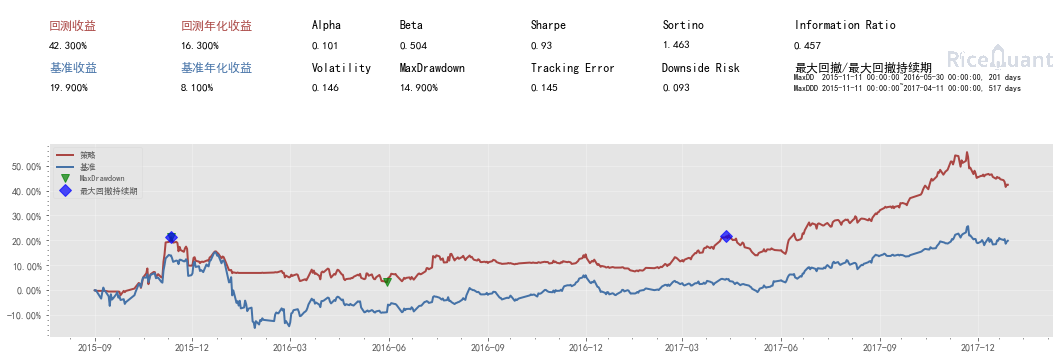

{'sys_analyser': {'summary': {'strategy_name': 'strategy',
   'start_date': '2015-09-01',
   'end_date': '2017-12-29',
   'strategy_file': 'strategy.py',
   'run_type': 'BACKTEST',
   'benchmark': '000300.XSHG',
   'STOCK': 1000000.0,
   'alpha': 0.101,
   'beta': 0.504,
   'sharpe': 0.93,
   'information_ratio': 0.457,
   'downside_risk': 0.093,
   'tracking_error': 0.145,
   'sortino': 1.463,
   'volatility': 0.146,
   'max_drawdown': 0.149,
   'total_value': 1423186.675,
   'cash': 510266.675,
   'total_returns': 0.423,
   'annualized_returns': 0.163,
   'unit_net_value': 1.423,
   'units': 1000000.0,
   'benchmark_total_returns': 0.199,
   'benchmark_annualized_returns': 0.081},
  'trades':                      commission         exec_id  last_price  last_quantity  \
  datetime                                                                     
  2015-09-01 15:00:00     35.7696  15337193094097       74.52          600.0   
  2015-09-02 15:00:00      5.6776  15337193094098       70

In [17]:
import numpy as np
import talib as ta
import pandas as pd
import rqalpha
from rqalpha.api import *

#读取文件位置
def init(context):
    context.codes = stock_df
    context.stocks = []
    context.SHORTPERIOD = 20
#     scheduler.run_weekly(find_pool, tradingday=1)
    scheduler.run_daily(find_pool)

def find_pool(context, bar_dict):
    try:
        codes = context.codes.loc[context.now]
    except KeyError:
        return
    stocks = codes.index[codes == 1]
    context.stocks = stocks

def handle_bar(context, bar_dict):
    buy(context, bar_dict)
    
    
def buy(context, bar_dict):
    pool = context.stocks
    print (pool)
    if pool is not None:
        stocks_len = len(pool)
        for stocks in context.portfolio.positions:
            if stocks not in pool:
                order_target_percent(stocks, 0)
        for codes in pool:
            try:
                price = history_bars(codes, context.SHORTPERIOD+10, '1d', 'close')
                short_avg = ta.SMA(price, context.SHORTPERIOD)
                cur_position = context.portfolio.positions[codes].quantity
                if short_avg[-1]<short_avg[-3] and cur_position > 0:
                    order_target_value(codes, 0)
                if short_avg[-1]  > short_avg[-3]:
                    order_target_percent(codes, 1.0/stocks_len)
            except Exception:
                pass


config = {
  "base": {
    "start_date": "2015-09-01",
    "end_date": "2017-12-30",
    "accounts": {'stock':1000000},
    "benchmark": "000300.XSHG"
  },
  "extra": {
    "log_level": "error",
  },
  "mod": {
    "sys_analyser": {
      "enabled": True,
      "plot": True
    }
  }
}

rqalpha.run_func(init=init, handle_bar=handle_bar, config=config)

## 按照特定权重下单

In [10]:
def get_largest_weight(df, n=20):
    largest_list = []
    for time_index, value in df.iterrows():
        largest_list.append(value.nlargest(n).to_dict())
    largest_df = pd.DataFrame(largest_list, index = df.index)
    return largest_df

In [11]:
largest_weight = get_largest_weight(ROE_Data)

In [12]:
weight_list = []
for time_index, weight in largest_weight.iterrows():
    weight[weight<0]=0
    weiht_result = (weight/weight.sum())
    weight_list.append(weiht_result.to_dict())
weight_df = pd.DataFrame(weight_list, index=largest_weight.index)

In [13]:
# weight_df

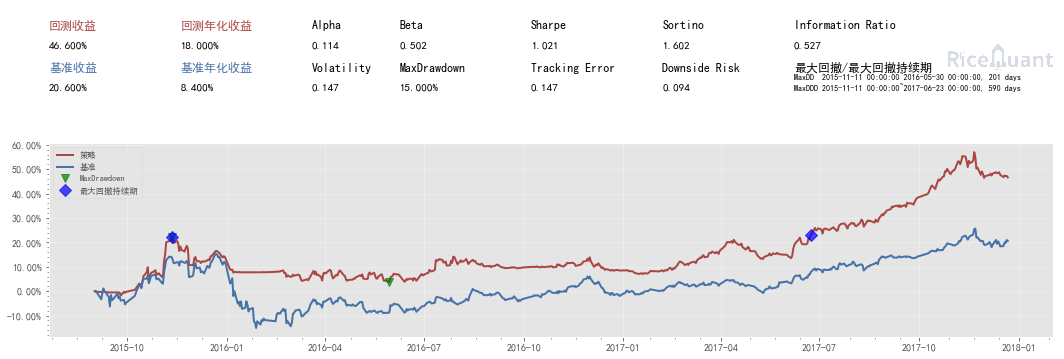

{'sys_analyser': {'summary': {'strategy_name': 'strategy',
   'start_date': '2015-09-01',
   'end_date': '2017-12-22',
   'strategy_file': 'strategy.py',
   'run_type': 'BACKTEST',
   'benchmark': '000300.XSHG',
   'STOCK': 1000000.0,
   'alpha': 0.114,
   'beta': 0.502,
   'sharpe': 1.021,
   'information_ratio': 0.527,
   'downside_risk': 0.094,
   'tracking_error': 0.147,
   'sortino': 1.602,
   'volatility': 0.147,
   'max_drawdown': 0.15,
   'total_value': 1466397.712,
   'cash': 615699.712,
   'total_returns': 0.466,
   'annualized_returns': 0.18,
   'unit_net_value': 1.466,
   'units': 1000000.0,
   'benchmark_total_returns': 0.206,
   'benchmark_annualized_returns': 0.084},
  'trades':                      commission         exec_id  last_price  last_quantity  \
  datetime                                                                     
  2015-09-01 15:00:00     47.6928  15337193091876       74.52          800.0   
  2015-09-02 15:00:00      5.6776  15337193091877       70.

In [14]:
import numpy as np
import talib as ta
import pandas as pd
import rqalpha
from rqalpha.api import *

#读取文件位置
def init(context):
    context.codes = weight_df
    context.hs300 = '000300.XSHG'
    context.SHORTPERIOD = 20
    context.stocks = {}
    scheduler.run_daily(find_pool)
#     scheduler.run_weekly(find_pool,tradingday=3)

def find_pool(context, bar_dict):
    codes = context.codes.loc[context.now].dropna()
    if codes is not None:
        context.stocks = codes
    else:
        context.stocks = {}

def handle_bar(context, bar_dict):
    buy(context, bar_dict)
    
    
def buy(context, bar_dict):
    pool = context.stocks
    if pool is not None:
        for stocks in context.portfolio.positions:
            if stocks not in pool:
                order_target_percent(stocks, 0)
        for codes, target in pool.items():
            try:
                price = history_bars(codes, context.SHORTPERIOD+10, '1d', 'close')
                short_avg = ta.SMA(price, context.SHORTPERIOD)
                cur_position = context.portfolio.positions[codes].quantity
                if short_avg[-1]<short_avg[-3] and cur_position > 0:
                    order_target_value(codes, 0)
                if short_avg[-1]  > short_avg[-3]:
                    order_target_percent(codes, target)
            except Exception:
                pass
                
config = {
  "base": {
    "start_date": "2015-09-01",
    "end_date": "2017-12-24",
    "accounts": {'stock':1000000},
    "benchmark": "000300.XSHG"
  },
  "extra": {
    "log_level": "error",
  },
  "mod": {
    "sys_analyser": {
      "enabled": True,
      "plot": True
    }
  }
}

rqalpha.run_func(init=init, handle_bar=handle_bar, config=config)